# Actividad Asíncrona IA

## Capítulo 3, Capítulo 4 y Capítulo 5
### Nombre: Patricio Quishpe

### Resolución de problemas

___

## Ejercicio 1. Cap 3 - Un array de Numpy
#### Seleccione la opción correcta y justifique su respuesta.

  a. Crece dinámicamente cuando se genera; permite arreglos de distintos tamaños y tipos.  
  
  b. Tiene un tamaño fijo cuando se genera, todos los elementos tienen datos de tipo homogéneo y mantienen el mismo tamaño en memoria.

  c. Crece dinámicamente cuando se genera y todos los elementos tienen datos de tipo homogéneo.  

  d. Tiene un tamaño fijo cuando se genera; permite arreglos de distintos tamaños y tipos.  



Opcion correcta b: por que en numpy, cuando se genera es de un tamaño fijo, ademas de ser homogeneo y esto es escencial para el analisis de datos en grandes volumenes


___

## ## Ejercicio 2. Cap 3 - ¿Qué característica se obtiene de la siguiente ejecución: *df.A.corr(df.B)*?
#### Seleccione la opción correcta y justifique su respuesta.
![image.png](attachment:image.png)

a.	Matriz de correlación tomando las variables numéricas por pares de ‘A’ y ‘B’.

b.	Correlaciones entre 'A' y las demás variables numéricas.´

c.	Correlación entre la columna 'A' y la columna 'B'.

d.	Estadísticas descriptivas de las columnas (variables).



Respuesta C
c. Correlación entre la columna 'A' y la columna 'B

Calcula el coeficiente de correlación de Pearson entre las dos columnas del DataFrame llamadas A y B.

La correlación mide el grado de relación lineal entre dos variables numéricas.

El resultado es un único valor numérico entre -1 y 1:

___

In [ ]:
import pandas as pd

df.A.corr(df.B)

___

## Ejercicio 1. Cap 4 - Carga de datos sintéticos
**Descripción:** Genere un conjunto de datos que simule la **duración (minutos)** de llamadas al soporte técnico.  
**Supuesto razonable:** variable positiva, asimétrica (p. ej., distribución *Gamma* o *Lognormal*).

**Tareas**
1. Genere `n=500` observaciones con parámetros que considere razonables.
2. Guarde el resultado en un `DataFrame` con la columna `duracion_min`.
3. Muestre `head()` y un resumen con `describe()`.

> **Tip:** `stats.lognorm(s=sigma, scale=np.exp(mu)).rvs(n)`

In [3]:
import numpy as np
import pandas as pd
from scipy import stats

# 1. Defina el tamaño de la muestra
n = 500

# 2. Asigne los parámetros mu y sigma de la distribución Lognormal
mu = 2.0      # media del logaritmo natural
sigma = 0.5   # desviación estándar del logaritmo natural

# 3. Genere los datos aleatorios (duración en minutos)
duraciones = stats.lognorm(s=sigma, scale=np.exp(mu)).rvs(n)

# 4. Cree un DataFrame con una columna llamada 'duracion_min'
df = pd.DataFrame({'duracion_min': duraciones})

# 5. Muestre las primeras filas y el resumen estadístico
print("Primeras filas del DataFrame:")
print(df.head(), "\n")

print("Resumen estadístico:")
print(df.describe())


Primeras filas del DataFrame:
   duracion_min
0     13.187324
1      6.082545
2      6.797082
3      5.766426
4      9.697812 

Resumen estadístico:
       duracion_min
count    500.000000
mean       8.173550
std        4.206837
min        1.675588
25%        5.170233
50%        7.208578
75%       10.055083
max       26.838114


## Ejercicio 2. Cap 4 - Función de densidad teórica vs datos
1. Ajuste una distribución **Lognormal** a los datos mediante máxima verosimilitud.
2. Sobreponga su **densidad** al histograma normalizado.
3. Reporte los parámetros estimados.

> **Tip:** `s, loc, scale = stats.lognorm.fit(df['duracion_min'], floc=0)`

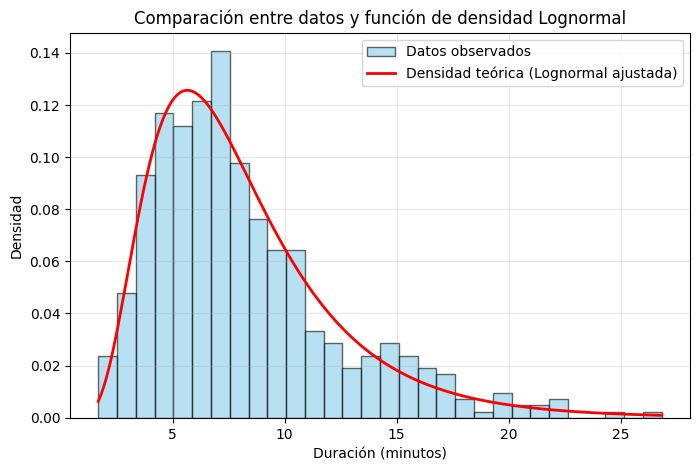

Parámetros estimados del ajuste Lognormal:
  s (sigma): 0.4965
  loc: 0.0000
  scale: 7.2336


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# -------------------------------------------------------------------
# Supongamos que ya tienes el DataFrame df del ejercicio anterior:
# (si no, puedes descomentar estas líneas para generarlo nuevamente)
# -------------------------------------------------------------------
# mu, sigma = 2.0, 0.5
# n = 500
# df = pd.DataFrame({'duracion_min': stats.lognorm(s=sigma, scale=np.exp(mu)).rvs(n)})

# 1. Ajuste de la distribución Lognormal usando máxima verosimilitud
s, loc, scale = stats.lognorm.fit(df['duracion_min'], floc=0)

# 2. Generar un rango de valores (x) para la curva de densidad
x = np.linspace(df['duracion_min'].min(), df['duracion_min'].max(), 200)

# 3. Calcular la función de densidad teórica (PDF)
pdf = stats.lognorm.pdf(x, s, loc, scale)

# 4. Graficar el histograma normalizado y la curva de densidad ajustada
plt.figure(figsize=(8,5))
plt.hist(df['duracion_min'], bins=30, density=True, alpha=0.6,
         color='skyblue', edgecolor='black', label='Datos observados')
plt.plot(x, pdf, 'r-', lw=2, label='Densidad teórica (Lognormal ajustada)')

# 5. Etiquetas, título y leyenda
plt.xlabel('Duración (minutos)')
plt.ylabel('Densidad')
plt.title('Comparación entre datos y función de densidad Lognormal')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 6. Reporte de parámetros estimados
print("Parámetros estimados del ajuste Lognormal:")
print(f"  s (sigma): {s:.4f}")
print(f"  loc: {loc:.4f}")
print(f"  scale: {scale:.4f}")


## Ejercicio 1. Cap 5 - Aplicación del Modelo de Aprendizaje Supervisado para Predicción Numérica

### Actividad 2: Regresión Lineal
2.1 Implementa un modelo de regresión lineal para predecir una variable numérica.

2.2 Entrena el modelo con un conjunto de datos y evalúa su rendimiento.


Primeras filas del conjunto de datos:
   Publicidad     Ventas
0    3.745401  18.282998
1    9.507143  37.676986
2    7.319939  30.803310
3    5.986585  21.977909
4    1.560186  10.021309 

🔹 Rendimiento del modelo:
Coeficiente (pendiente): 3.420
Intercepto: 5.286
Error cuadrático medio (MSE): 2.615
Coeficiente de determinación (R²): 0.977



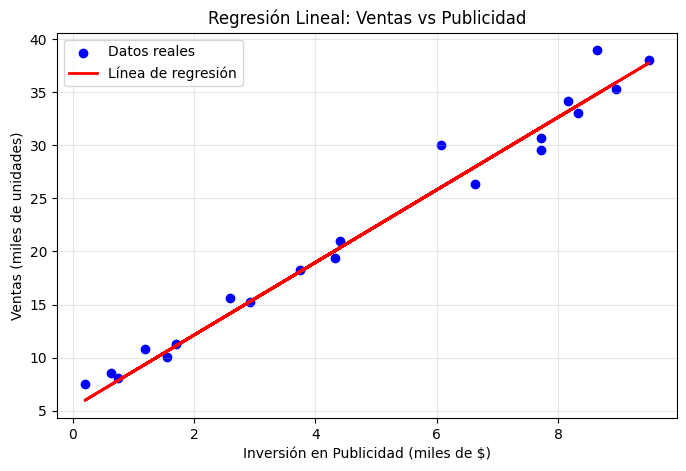

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1️Generar un conjunto de datos sintético
# Supondremos que queremos predecir las ventas (y) a partir del gasto en publicidad (x)
np.random.seed(42)
x = np.random.rand(100, 1) * 10   # inversión en publicidad (miles de $)
y = 3.5 * x + 5 + np.random.randn(100, 1) * 2  # ventas (miles de unidades)

# Convertir a DataFrame
df = pd.DataFrame({'Publicidad': x.flatten(), 'Ventas': y.flatten()})
print("Primeras filas del conjunto de datos:")
print(df.head(), "\n")

# 2️ Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    df[['Publicidad']], df['Ventas'], test_size=0.2, random_state=42
)

# 3️ Crear e implementar el modelo de Regresión Lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 4️ Realizar predicciones
y_pred = modelo.predict(X_test)

# 5️ Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("🔹 Rendimiento del modelo:")
print(f"Coeficiente (pendiente): {modelo.coef_[0]:.3f}")
print(f"Intercepto: {modelo.intercept_:.3f}")
print(f"Error cuadrático medio (MSE): {mse:.3f}")
print(f"Coeficiente de determinación (R²): {r2:.3f}\n")

# 6️⃣ Visualización de resultados
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.title('Regresión Lineal: Ventas vs Publicidad')
plt.xlabel('Inversión en Publicidad (miles de $)')
plt.ylabel('Ventas (miles de unidades)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


## Ejercicio 2. Cap 5 - Aplicación del Modelo de Aprendizaje Supervisado para Clasificación

### Actividad 3: Clasificación con Regresión Logística
3.1 Utiliza el algoritmo de regresión logística para clasificar datos en dos categorías.

3.2 Evalúa la precisión y otras métricas del modelo.

Primeras filas del conjunto de datos:
   horas_estudio  promedio  aprobado
0       3.745401  8.210158         1
1       9.507143  5.420700         1
2       7.319939  5.808144         1
3       5.986585  9.492771         1
4       1.560186  8.032145         0 

🔹 Precisión del modelo: 0.983

🔹 Matriz de confusión:
[[27  0]
 [ 1 32]]

🔹 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.97      0.98        33

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



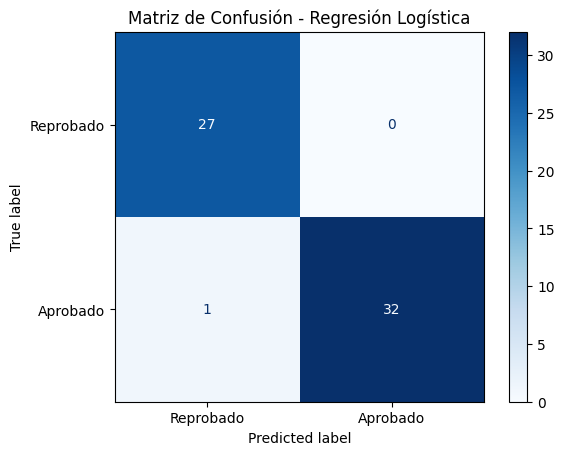

In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# 1️ Generar un conjunto de datos sintético
# Supongamos que queremos clasificar si un estudiante aprueba (1) o reprueba (0)
# según las horas de estudio y su promedio anterior.
np.random.seed(42)
n = 200

horas_estudio = np.random.uniform(0, 10, n)
promedio = np.random.uniform(5, 10, n)

# Probabilidad de aprobar (función sigmoide)
prob_aprobar = 1 / (1 + np.exp(-(0.8*horas_estudio + 0.5*promedio - 7)))
aprobado = (prob_aprobar > 0.5).astype(int)  # 1 si aprueba, 0 si no

# Crear DataFrame
df = pd.DataFrame({
    'horas_estudio': horas_estudio,
    'promedio': promedio,
    'aprobado': aprobado
})

print("Primeras filas del conjunto de datos:")
print(df.head(), "\n")

# 2️ Dividir en conjuntos de entrenamiento y prueba
X = df[['horas_estudio', 'promedio']]
y = df['aprobado']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3️ Crear y entrenar el modelo de regresión logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# 4️ Realizar predicciones
y_pred = modelo.predict(X_test)

# 5️ Evaluar el modelo
precision = accuracy_score(y_test, y_pred)
matriz_conf = confusion_matrix(y_test, y_pred)
reporte = classification_report(y_test, y_pred)

print(f"🔹 Precisión del modelo: {precision:.3f}")
print("\n🔹 Matriz de confusión:")
print(matriz_conf)
print("\n🔹 Reporte de clasificación:")
print(reporte)

# 6️⃣ Visualizar la matriz de confusión
ConfusionMatrixDisplay(confusion_matrix=matriz_conf,
                       display_labels=['Reprobado', 'Aprobado']).plot(cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()


___

# Fin